In [1]:
import os

from IPython.display import display, HTML
# import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import ensemble as ensembles
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
features_dir = '../processed_features/'
# sample_file = 'twitter_patterns.csv'
sample_file = 'twitter_patterns_graph.csv'
data = pd.read_csv(os.path.join(features_dir, sample_file))

In [3]:
with pd.option_context('display.max_rows', 500, 'display.max_columns', 50, 'display.max_colwidth', -1):
    display(data)

,tp_group,tp_author,tp_tweet_len,tp_clean_tweet_len,tp_sentiment,tp_emojis_num,tp_mentions_num,tp_hashtags_num,tp_has_url,tp_has_image,tp_has_gif,tp_has_video,tp_has_place,tp_replies_count,tp_retweets_count,tp_likes_count,tp_is_retweet,tp_is_reply,tp_is_quote,tp_monthly,tn_degree_in,tn_degree_out,tn_degree_total,tn_pagerank,tn_betweenness,tn_closeness,tn_eigenvector,tn_authority,tn_hub,tn_lcc
0,actors,aamir_khan,102.611650,49.473786,0.148056,0.027184,0.368932,0.219417,0.246602,0.091262,0.000000,0.034951,0.000000,526.823301,1539.471845,8190.353398,0.0,0.196117,0.005825,7.253521,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,actors,actorleeminho,84.586957,32.739130,0.156582,0.000000,0.228261,0.217391,0.500000,0.043478,0.000000,0.000000,0.000000,777.826087,2181.260870,4422.902174,0.0,0.000000,0.000000,2.486486,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,actors,actuallynph,127.553894,63.109179,0.102135,0.009736,0.577538,0.248609,0.263213,0.143950,0.002434,0.016342,0.000000,197.439152,793.188804,2276.398470,0.0,0.039638,0.036509,26.145455,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
3,actors,alyssa_milano,92.045067,36.742074,0.126427,0.054076,0.722433,0.288471,0.276533,0.030127,0.002018,0.006892,0.000000,66.987816,248.496480,667.926922,0.0,0.280152,0.076425,344.305085,5.0,49.0,54.0,0.000874,0.023033,0.380911,6.423489e-03,9.985375e-03,1.010442e-01,0.144654
4,actors,annecurtissmith,96.280393,40.721885,0.115718,0.501062,0.687837,0.158883,0.334667,0.029954,0.000062,0.002586,0.000000,30.051011,93.392144,402.906289,0.0,0.250038,0.079241,275.279661,0.0,5.0,5.0,0.000268,0.000000,0.234535,0.000000e+00,0.000000e+00,3.590162e-03,0.300000
5,actors,aplusk,86.637150,39.147986,0.068056,0.002080,0.523752,0.132334,0.161340,0.039623,0.000766,0.001423,0.000000,32.697680,144.443082,275.555276,0.0,0.155539,0.008319,76.133333,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6,actors,ashleymgreene,90.611411,39.074573,0.131980,0.058401,0.610961,0.282120,0.292453,0.062893,0.003145,0.002695,0.000000,28.216532,142.212938,161.416891,0.0,0.170710,0.009883,21.611650,2.0,6.0,8.0,0.000501,0.000286,0.235262,2.807751e-03,5.671980e-04,1.461251e-03,0.178571
7,actors,audrinapatridge,86.150623,41.098254,0.091699,0.057855,0.645387,0.126683,0.100083,0.047049,0.000000,0.001164,0.000000,7.131505,17.144971,19.129510,0.0,0.267830,0.000166,62.010309,1.0,1.0,2.0,0.000355,0.000054,0.207836,6.003312e-05,3.549666e-05,5.608560e-05,0.000000
8,actors,azizansari,102.246275,50.106447,0.012861,0.006160,0.582378,0.216762,0.146418,0.015903,0.000143,0.000860,0.000000,25.643983,193.124642,224.847421,0.0,0.250860,0.017908,69.108911,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
9,actors,billcosby,105.867401,45.183260,0.095896,0.002203,0.868282,0.293392,0.230396,0.033040,0.000000,0.003524,0.000000,15.742731,46.340529,55.413656,0.0,0.327753,0.000441,26.091954,1.0,0.0,1.0,0.000430,0.000000,0.000000,3.049564e-03,5.957610e-04,0.000000e+00,0.000000


In [4]:
training_part = 0.8
estimators = 30

In [5]:
x = data.drop(['tp_author', 'tp_group'], axis=1).values
y = data['tp_group'].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-training_part)

In [7]:
# x = preprocessing.normalize(x)

In [8]:
model = ensembles.RandomForestClassifier(n_estimators=estimators)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
y_pred = model.predict(x_test)

In [10]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred, average='macro'))
print('F1:', metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7228915662650602
Precision: 0.7223268547184956
Recall: 0.7168207282913166
F1: 0.7190569473568039


In [11]:
def draw_confusion_matrix(true_values, pred_values, classes, normalize):
    plt.figure(figsize=(10, 5))
    cm = metrics.confusion_matrix(true_values, pred_values)
    if normalize:
        cm = cm / cm.sum(axis=1)[:, np.newaxis]
        np.round(cm, 2)
    cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(cm, annot=True)

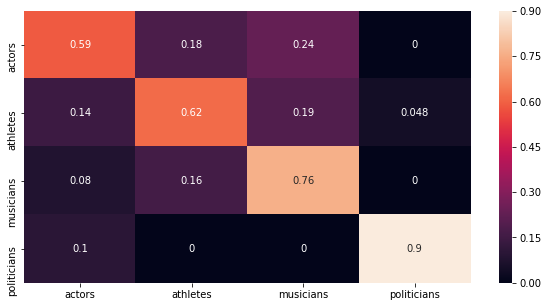

In [12]:
draw_confusion_matrix(y_test, y_pred, model.classes_, normalize=True)

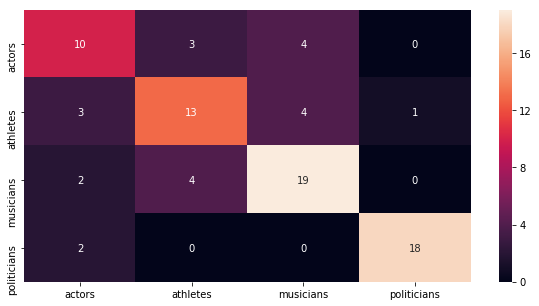

In [13]:
draw_confusion_matrix(y_test, y_pred, model.classes_, normalize=False)